<a href="https://colab.research.google.com/github/PauloLucena2022/Atividade-01---LLM-e-Estat-stica/blob/main/Colab%20Notebook/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1: Z-score e Binomial Distribution Sample distribution and Sampling Distribution TLC p-value



## Parte 1: Z-Score e Binomial Distribution

Introdução:



### Seção A

#### Comando:
* Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala.


In [1]:
# Importações e leitura do dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

occupancy = pd.read_csv('datatraining.txt')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


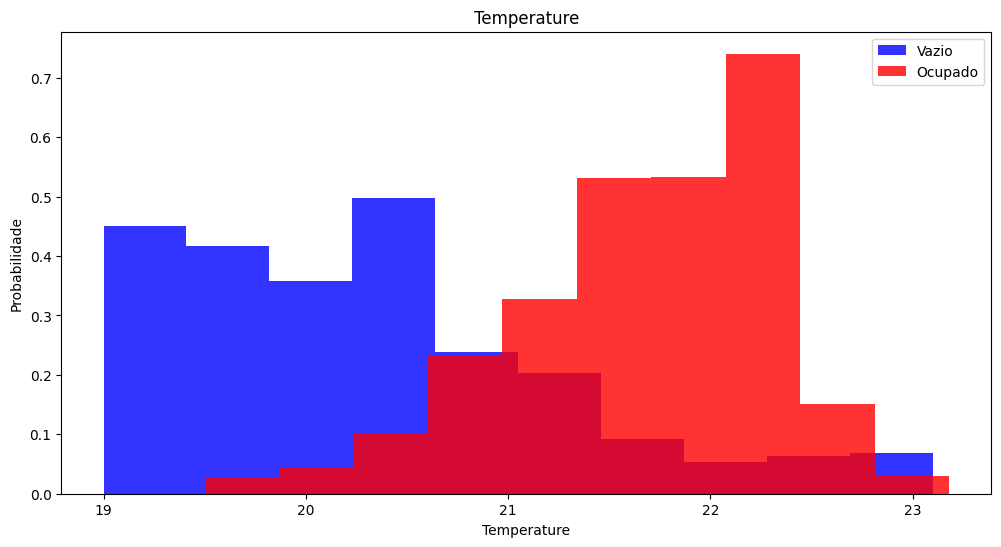

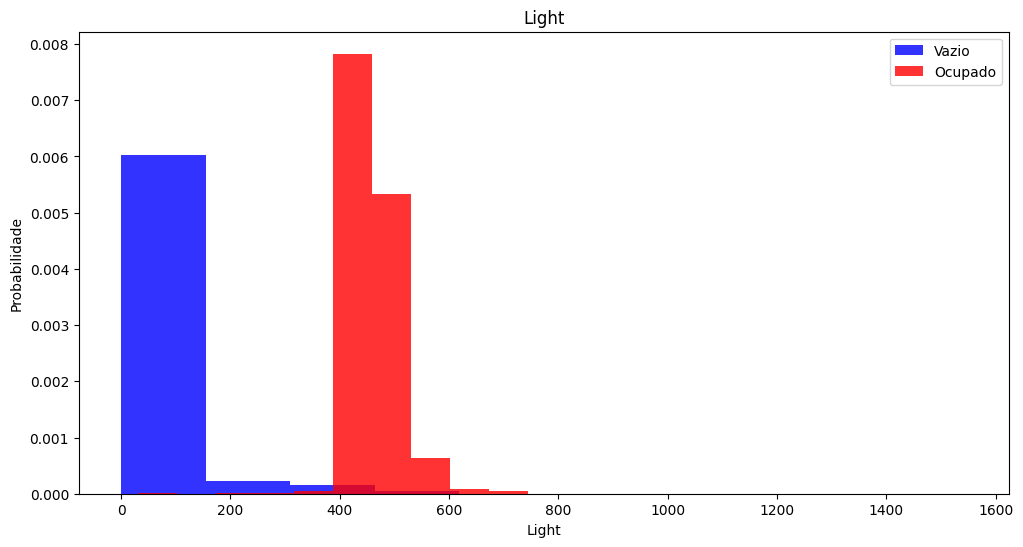

In [2]:
# Plot dos histogramas para: Temperatura, Humidade, Luz, CO2 e Razão de Humidade
classes_escolhidas_histograma = ['Temperature', 'Light']
for classes in classes_escolhidas_histograma:
  plt.figure(figsize = (12,6))

  plt.hist(occupancy[occupancy['Occupancy'] == 0][classes], color = 'blue', label = 'Vazio', alpha = 0.8, density = True)
  plt.hist(occupancy[occupancy['Occupancy'] == 1][classes], color = 'red', label = 'Ocupado', alpha = 0.8, density = True)

  plt.title(classes)
  plt.ylabel('Probabilidade')
  plt.xlabel(classes)
  plt.legend()

* Faça dois conjuntos de histogramas com tamanhos de bins diferentes.


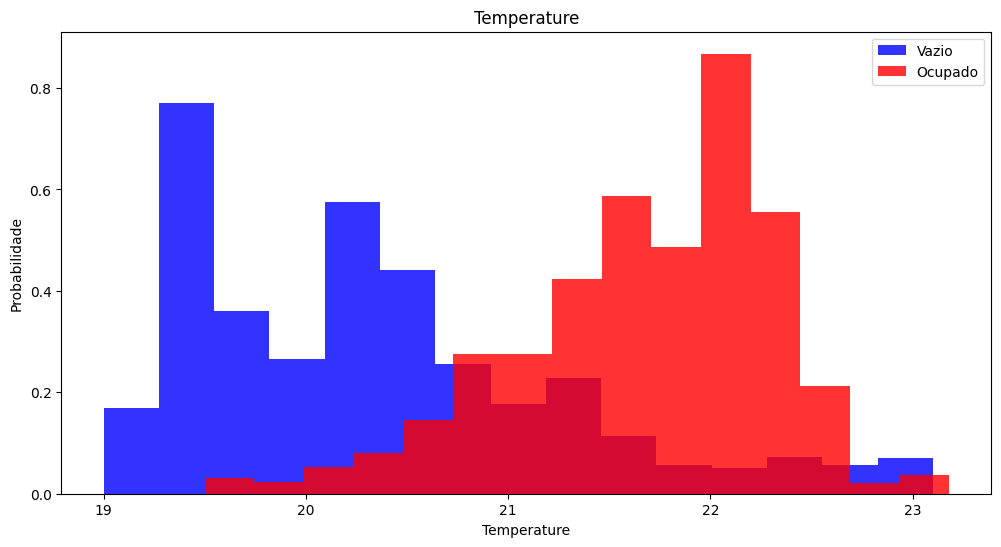

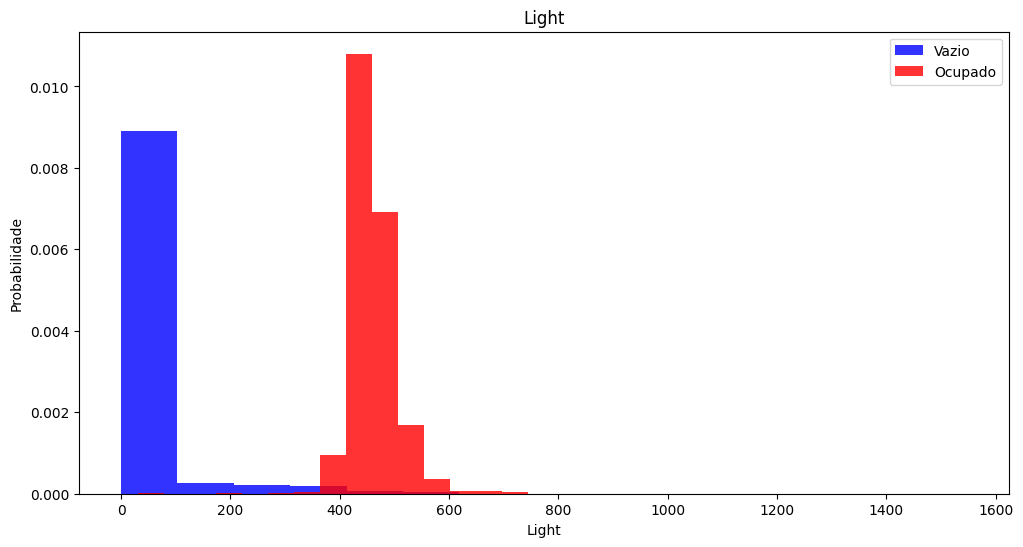

In [3]:
# Primeiro conjunto terá apenas 15 bins
for classes in classes_escolhidas_histograma:
  plt.figure(figsize = (12,6))

  plt.hist(occupancy[occupancy['Occupancy'] == 0][classes], color = 'blue', label = 'Vazio', alpha = 0.8, density = True, bins = 15)
  plt.hist(occupancy[occupancy['Occupancy'] == 1][classes], color = 'red', label = 'Ocupado', alpha = 0.8, density = True, bins = 15)

  plt.title(classes)
  plt.ylabel('Probabilidade')
  plt.xlabel(classes)
  plt.legend()

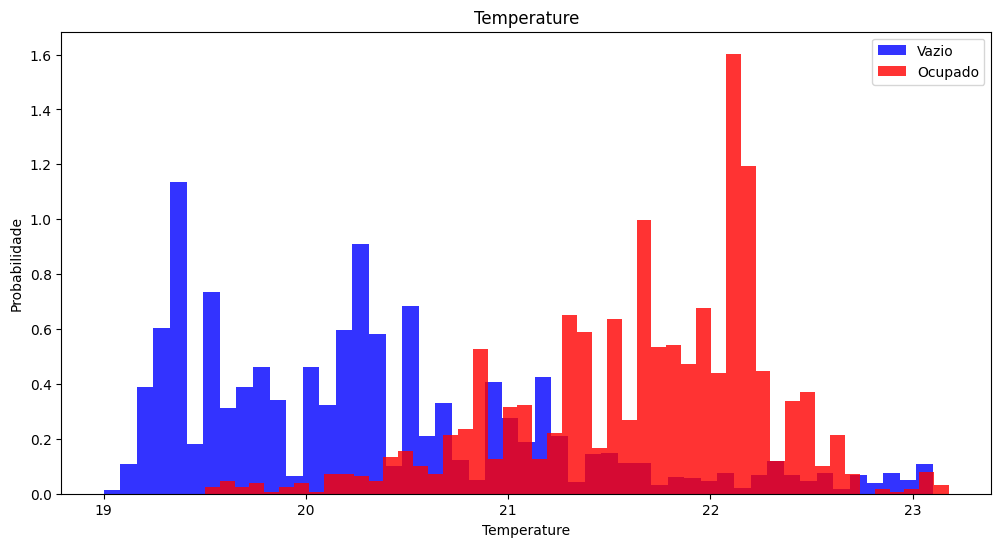

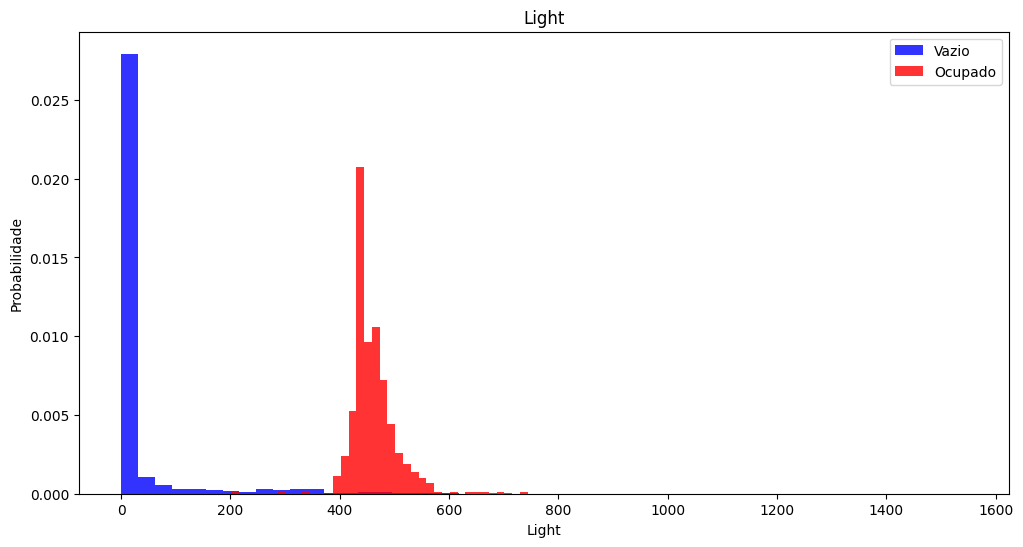

In [4]:
# Segundo conjunto terá 50 bins
for classes in classes_escolhidas_histograma:
  plt.figure(figsize = (12,6))

  plt.hist(occupancy[occupancy['Occupancy'] == 0][classes], color = 'blue', label = 'Vazio', alpha = 0.8, density = True, bins = 50)
  plt.hist(occupancy[occupancy['Occupancy'] == 1][classes], color = 'red', label = 'Ocupado', alpha = 0.8, density = True, bins = 50)

  plt.title(classes)
  plt.ylabel('Probabilidade')
  plt.xlabel(classes)
  plt.legend()

* Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

### Seção B

In [5]:
# Variável escolhida: Temperatura
temperatura = occupancy['Temperature']
temperatura.head()

,Temperature
1,23.18
2,23.15
3,23.15
4,23.15
5,23.10


In [6]:
temperatura.describe()

,Temperature
count,8143.000000
mean,20.619084
std,1.016916
min,19.000000
25%,19.700000
50%,20.390000
75%,21.390000
max,23.180000


In [7]:
# Dados artificiais ("coletados") estarão entre 19(min) e 23.18(max)
media = temperatura.mean()
desvio_padrao = temperatura.std()

np.random.seed(3)
temperaturas_artificiais = np.random.normal(media, desvio_padrao, 500)
temperaturas_artificiais

array([22.43796934, 21.06297768, 20.7172135 , 18.72406727, 20.33700302,
       20.2583234 , 20.53494247, 19.98147634, 20.57452422, 20.13379278,
       19.28299297, 21.51867068, 21.51531045, 22.3575766 , 20.66996367,
       20.20756052, 20.06449814, 19.04644543, 21.61806924, 19.49938986,
       19.41399034, 20.40995488, 22.13037234, 20.8598043 , 19.5779797 ,
       19.89402913, 21.25490553, 20.45585496, 19.83724132, 20.38516162,
       21.37674361, 22.62862319, 19.35391417, 19.98206998, 19.80172068,
       18.15907819, 19.67966435, 19.57788755, 21.76207531, 20.48493789,
       18.96833798, 21.27669854, 20.25678605, 18.84645486, 20.01234081,
       20.02053234, 19.73041836, 20.64930011, 18.33279335, 20.3467922 ,
       21.64940654, 21.48630779, 21.74601773, 21.7574104 , 22.13179071,
       19.48186529, 21.47922554, 18.72671448, 20.00599987, 18.67222554,
       21.68496208, 21.97538356, 20.41832941, 22.42374935, 19.93294214,
       20.77224841, 20.77461664, 19.53688597, 21.06443875, 22.59

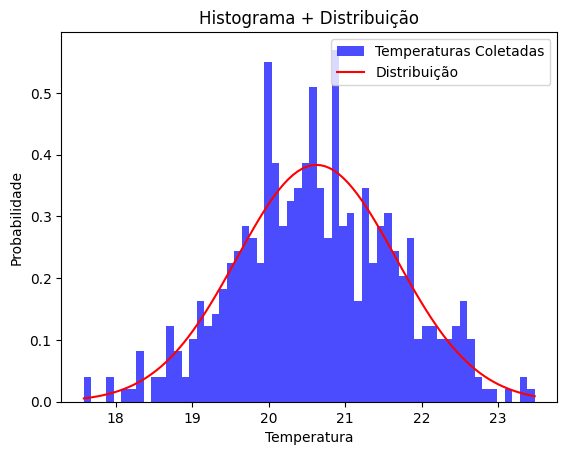

In [8]:
# Histograma + Distribuição dos Dados Coletados
media, desvio_padrao = norm.fit(temperaturas_artificiais)

x = np.linspace(min(temperaturas_artificiais), max(temperaturas_artificiais), 100)
y = norm.pdf(x, media, desvio_padrao)

plt.hist(temperaturas_artificiais, color = 'blue', label = 'Temperaturas Coletadas', density = True, alpha = 0.7 , bins = 60)
plt.legend()

plt.plot(x, y, label = 'Distribuição', color = 'red')
plt.xlabel('Temperatura')
plt.ylabel('Probabilidade')
plt.title('Histograma + Distribuição')
plt.legend()

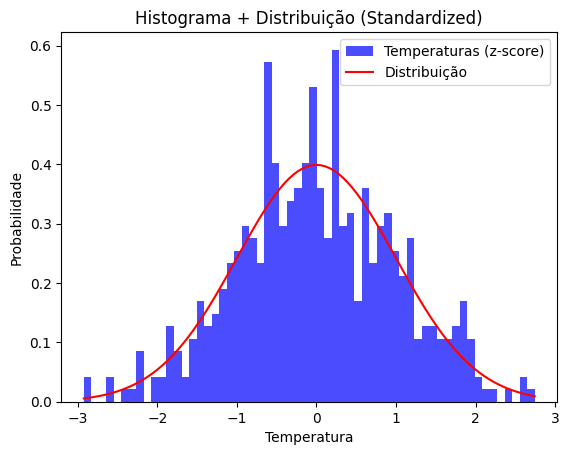

In [9]:
# versão standardized
z = (temperaturas_artificiais - media) / desvio_padrao

x_z_score = np.linspace(min(z), max(z), 100)
y_z_score = norm.pdf(x_z_score, 0, 1)

plt.hist(z, color = 'blue', label = 'Temperaturas (z-score)', density = True, alpha = 0.7 , bins = 60)
plt.legend()

plt.plot(x_z_score, y_z_score, label = 'Distribuição', color = 'red')
plt.xlabel('Temperatura')
plt.ylabel('Probabilidade')
plt.title('Histograma + Distribuição (Standardized)')
plt.legend()

Qual a probabilidade de a temperatura ser maior que 22 graus?

In [10]:
# P(X > 22)

z_exemplo1 = (22 - media) / desvio_padrao
print(f'z: {z_exemplo1:.2f}')

# P(z > 1.32)
prob_exemplo1 = 1 - norm.cdf(z_exemplo1)
print(f'Probabilidade de a temperatura ser maior que 22 graus: {prob_exemplo1 * 100:.2f}%')

z: 1.32
Probabilidade de a temperatura ser maior que 22 graus: 9.31%


Qual a probabilidade de a temperatura estar entre 19 e 20 graus?

In [11]:
# P(19 < X < 23)

z_exemplo2_19 = (19 - media) / desvio_padrao
print(f'z para 19: {z_exemplo2_19:.2f}')

z_exemplo2_23 = (23 - media) / desvio_padrao
print(f'z para 23: {z_exemplo2_23:.2f}')

# P(-1.56 < z < 2.28)
prob_exemplo2_19 = norm.cdf(z_exemplo2_19)
prob_exemplo2_23 = norm.cdf(z_exemplo2_23)
prob_exemplo2_total = prob_exemplo2_23 - prob_exemplo2_19

print(f'Probabilidade de a temperatura : {prob_exemplo2_total * 100:.2f}%')

z para 19: -1.56
z para 23: 2.28
Probabilidade de a temperatura : 92.97%


Qual a probabilidade de a temperatura ser menor que 19.5 graus?

In [12]:
# P(X < 19.5)

z_exemplo3 = (19.5 - media) / desvio_padrao
print(f'z: {z_exemplo3:.2f}')

# P(z < -1.08)
prob_exemplo3 = norm.cdf(z_exemplo3)
print(f'Probabilidade de a temperatura ser menor que 19.5 graus: {prob_exemplo3 * 100:.2f}%')

z: -1.08
Probabilidade de a temperatura ser menor que 19.5 graus: 13.97%


### Seção C

Probabilidade de 48 avaliações positivas: 0.11%


<Figure size 640x480 with 0 Axes>

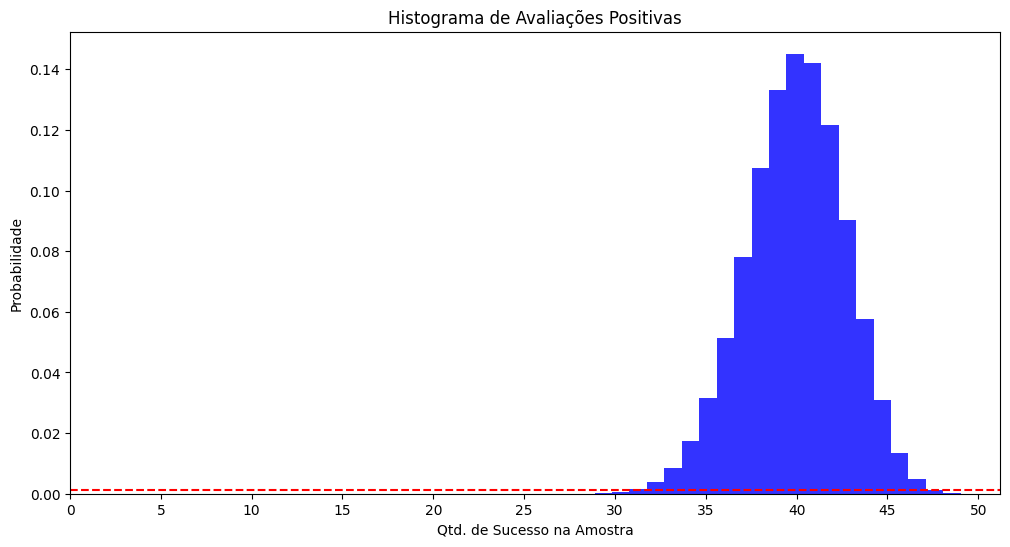

<Figure size 640x480 with 0 Axes>

In [13]:
from math import comb

# Variáveis pra botar na fórmula
n = 50
x = 48
p = 0.8
q = 1 - p

# Amostra
np.random.seed(10)
amostra = np.random.binomial(n, p, size = 242485) # avaliações positivas

# Binomial Probability
P_x = comb(n,x) * (p ** x) * (q ** (n - x))
print(f'Probabilidade de 48 avaliações positivas: {P_x * 100:.2f}%')

# Histograma
plt.figure(figsize = (12,6))
plt.hist(amostra, bins = 25, density = True, color = 'blue', alpha = 0.8)
plt.axhline(y = P_x, color = 'red', linestyle = '--')
plt.xticks(range(0, 51, 5))

plt.title('Histograma de Avaliações Positivas')
plt.xlabel('Qtd. de Sucesso na Amostra')
plt.ylabel('Probabilidade')

plt.figure()

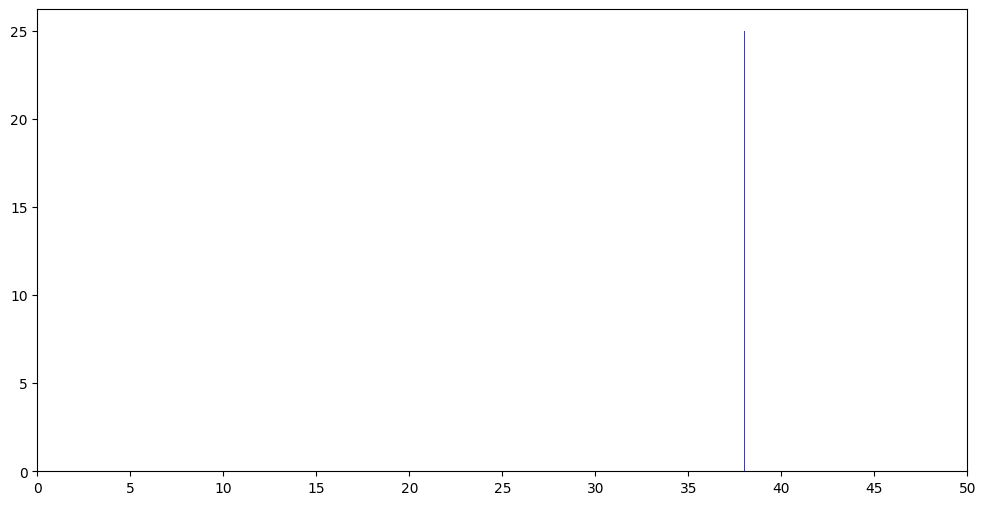

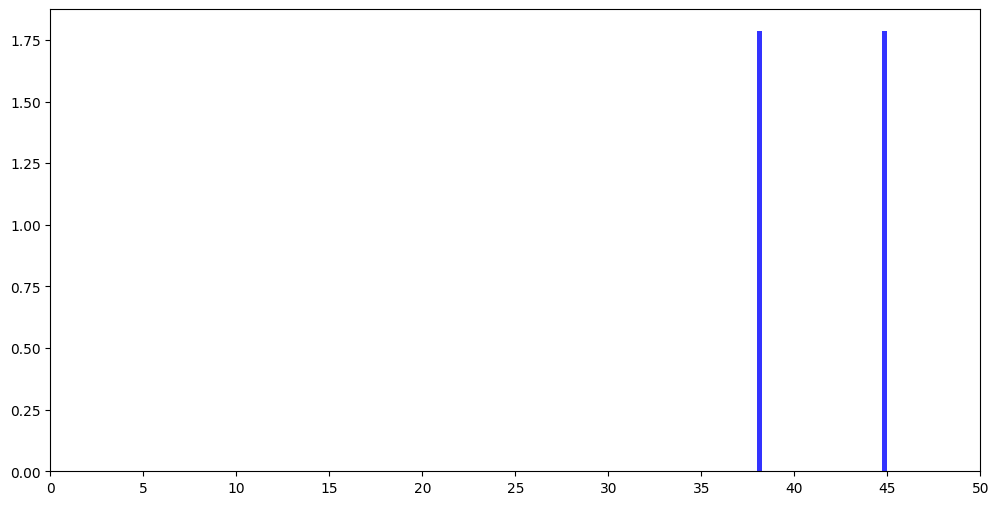

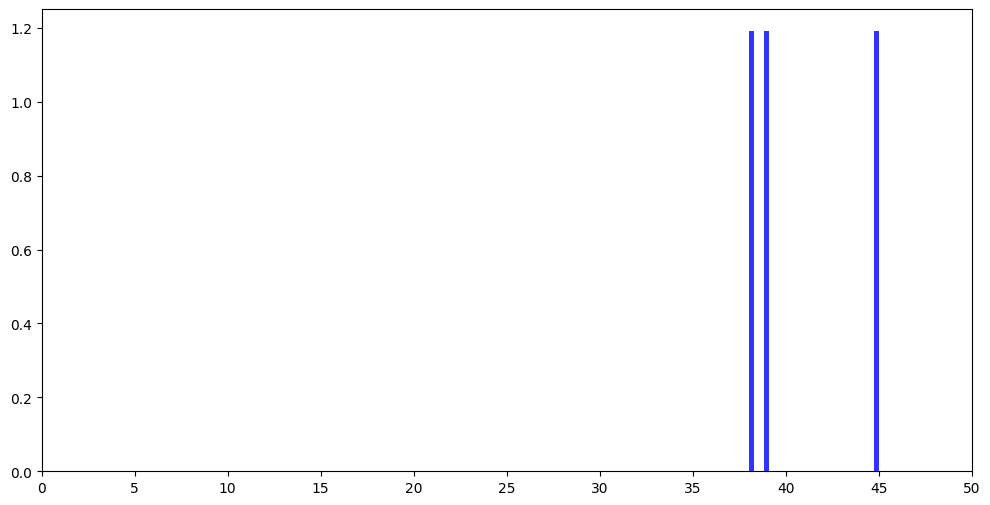

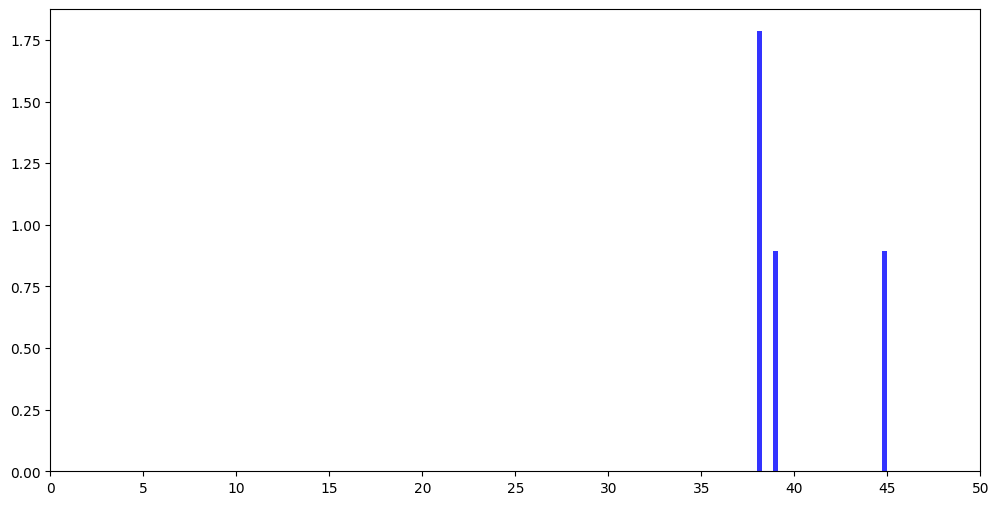

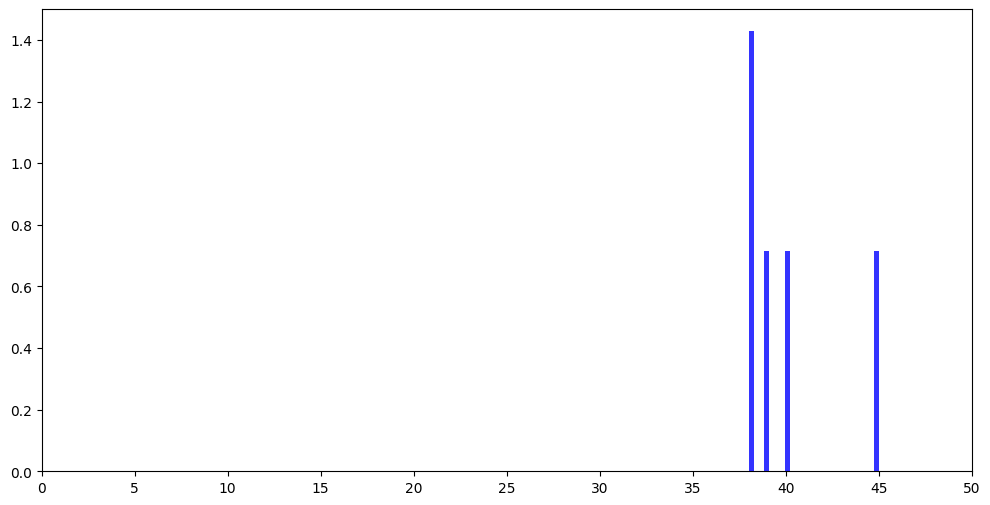

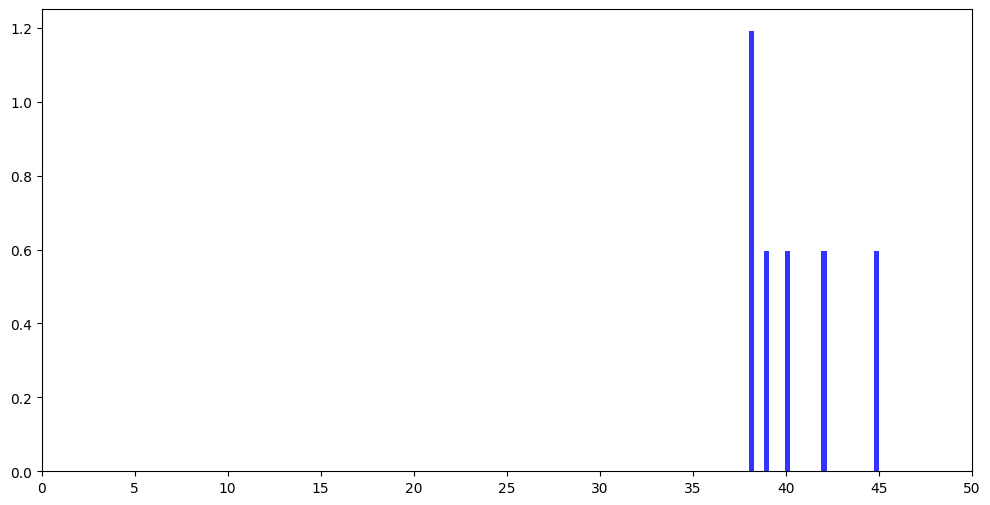

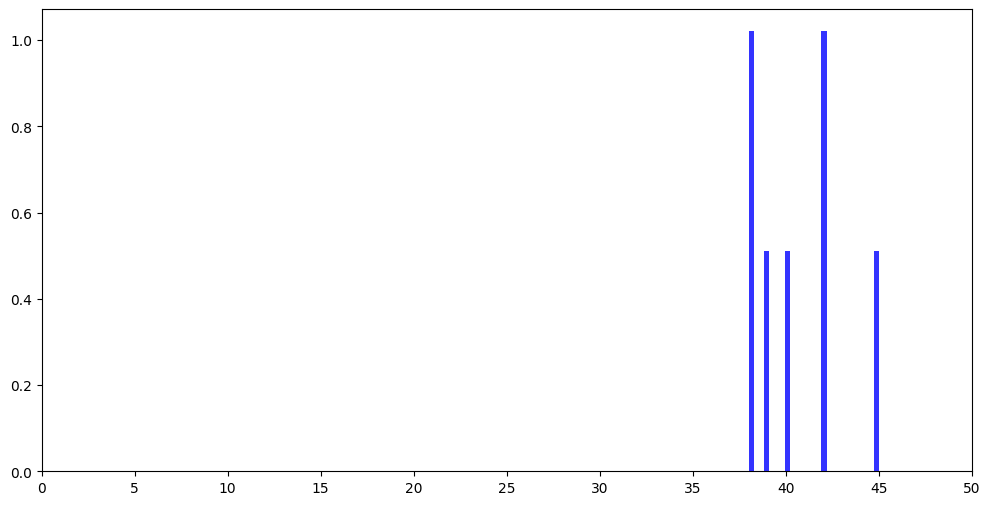

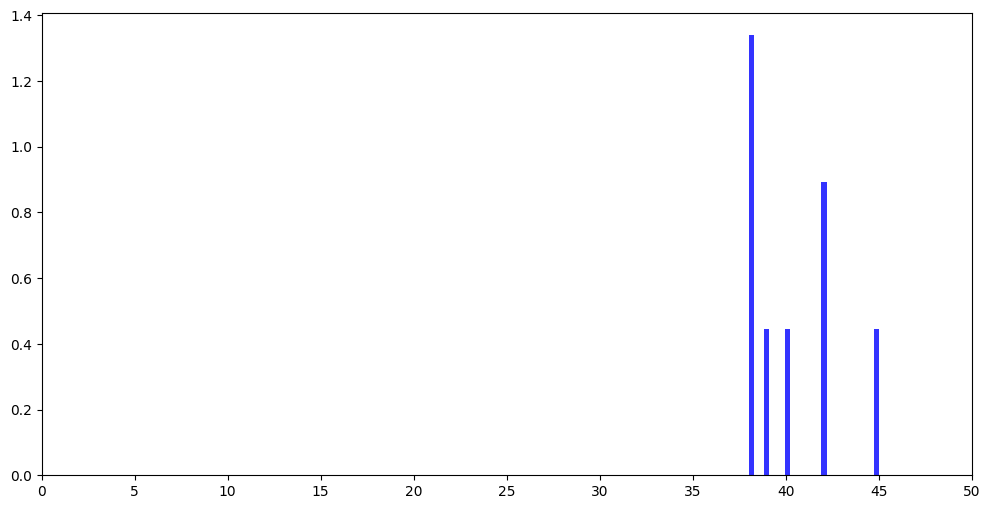

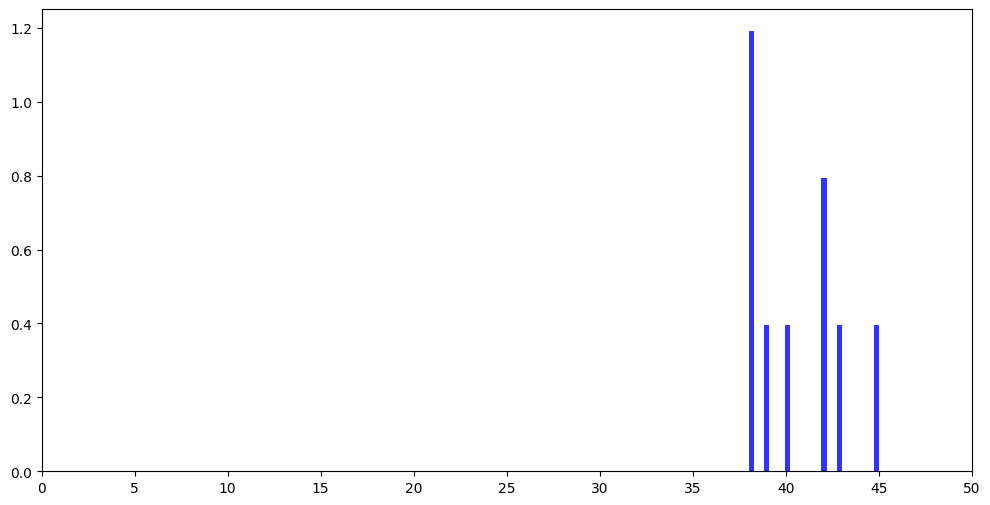

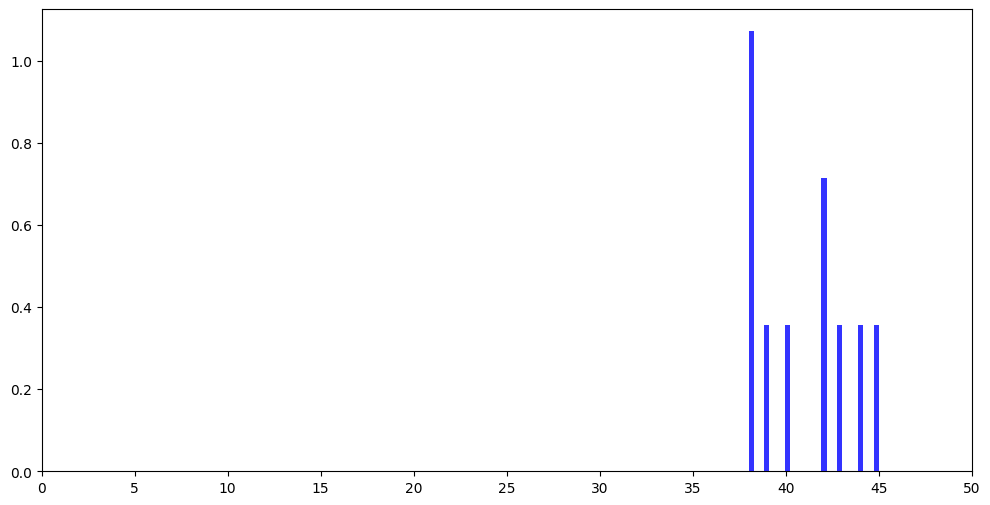

In [14]:
# Histogramas para as 10 primeiras amostras
amostra_10 = amostra[:10]
lista_amostra = []

for i in amostra_10:
  lista_amostra.append(i)

  plt.figure(figsize = (12,6))
  plt.hist(lista_amostra, bins = 25, density = True, color = 'blue', alpha = 0.8)
  plt.xticks(range(0, 51, 5))

## Parte 2: Sample distribution and sampling distribution TLC p-value

Introdução:



### Seção A: Sample Distribution

Média da População: 20.63
Desvio Padrão da População: 1.04


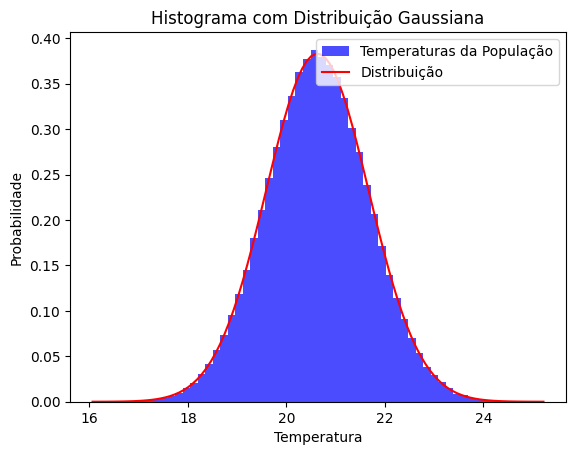

In [15]:
# Criando população artificial de Temperatura
# Obs: vou utilizar as mesmas variáveis media e desvio_padrao de anteriormente

np.random.seed(20)
populacao = np.random.normal(media, desvio_padrao, 200000)

media_populacao = np.mean(populacao)
desvio_padrao_populacao = np.std(populacao)

print(f'Média da População: {media_populacao:.2f}')
print(f'Desvio Padrão da População: {desvio_padrao_populacao:.2f}')

# Histograma com Distribuição Gaussiana

x = np.linspace(min(populacao), max(populacao), 100)
y = norm.pdf(x, media_populacao, desvio_padrao_populacao)

plt.hist(populacao, color = 'blue', label = 'Temperaturas da População', density = True, alpha = 0.7 , bins = 60)
plt.legend()

plt.plot(x, y, label = 'Distribuição', color = 'red')
plt.xlabel('Temperatura')
plt.ylabel('Probabilidade')
plt.title('Histograma com Distribuição Gaussiana')
plt.legend()

A Média desse sample é 20.50 e o Desvio Padrão é 1.02


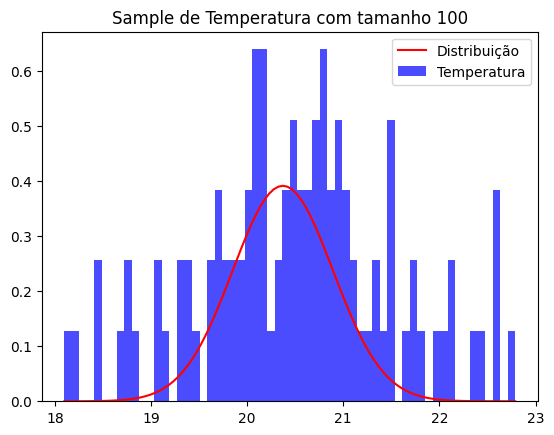

In [16]:
# Sample Distribution - 100 valores
np.random.seed(20)
sample = np.random.choice(populacao, size = 100)

media_sample = np.mean(sample)
desvio_padrao_sample = np.std(sample)

print(f'A Média desse sample é {media_sample:.2f} e o Desvio Padrão é {desvio_padrao_sample:.2f}')

x_sample = np.linspace(min(sample), max(sample), 100)
y_sample = norm.pdf(x, media_sample, desvio_padrao_sample)

plt.plot(x_sample, y_sample, label = 'Distribuição', color = 'red')

plt.hist(sample, color = 'blue', label = 'Temperatura', density = True, alpha = 0.7 , bins = 60)
plt.title('Sample de Temperatura com tamanho 100')
plt.legend()
plt.show()

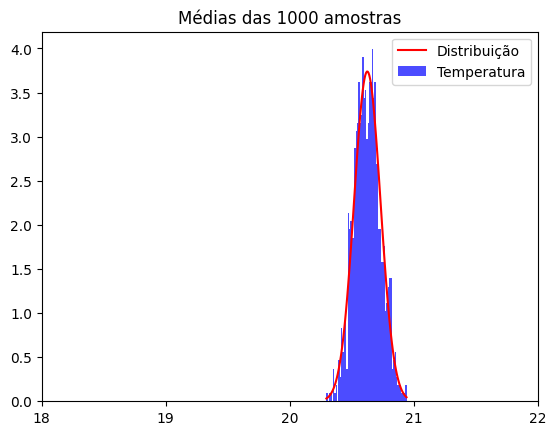

In [17]:
# Sampling Distribution - 1000 amostras de 100 valores cada
sampling = []
medias_sampling = [] # pegar todas as médias de cada amostra

np.random.seed(20)
for _ in range(1000):
  s = np.random.choice(populacao, size = 100)
  media_s = np.mean(s)

  medias_sampling.append(media_s)
  sampling.append(s)

media_das_medias_sampling = np.mean(medias_sampling)
desvio_padrao_das_medias_sampling = np.std(medias_sampling)

x_sampling = np.linspace(min(medias_sampling), max(medias_sampling), 100)
y_sampling = norm.pdf(x_sampling, media_das_medias_sampling, desvio_padrao_das_medias_sampling)

plt.plot(x_sampling, y_sampling, label = 'Distribuição', color = 'red')

plt.hist(medias_sampling, color = 'blue', label = 'Temperatura', density = True, alpha = 0.7 , bins = 60)
plt.xticks(range(18, 23))
plt.title('Médias das 1000 amostras')
plt.legend()
plt.show()

In [18]:
# Probabilidades de Possíveis eventos

# Qual a probabilidade de uma amostra ter média maior que 21 graus?

temperatura_objetivo = 21

probabilidade_evento01_cdf = norm.cdf(temperatura_objetivo, media_das_medias_sampling, desvio_padrao_das_medias_sampling)
probabilidade_evento01 = 1 - probabilidade_evento01_cdf

print(f'Probabilidade de uma amostra ter média maior que 21 graus: {probabilidade_evento01 * 100:.2f}%')

# Qual a probabilidade de uma amostra ter média entre 20 e 20.6 graus?

temperatura_objetivo_menor = 20
temperatura_objetivo_maior = 20.6

probabilidade_evento02_menor_cdf = norm.cdf(temperatura_objetivo_menor, media_das_medias_sampling, desvio_padrao_das_medias_sampling)
probabilidade_evento02_maior_cdf = norm.cdf(temperatura_objetivo_maior, media_das_medias_sampling, desvio_padrao_das_medias_sampling)

probabilidade_evento02 = temperatura_objetivo_maior - temperatura_objetivo_menor

print(f'Probabilidade de uma amostra ter média entre 20 e 20.6 graus: {probabilidade_evento02 * 100:.2f}%')

Probabilidade de uma amostra ter média maior que 21 graus: 0.02%
Probabilidade de uma amostra ter média entre 20 e 20.6 graus: 60.00%


### Seção B: TLC

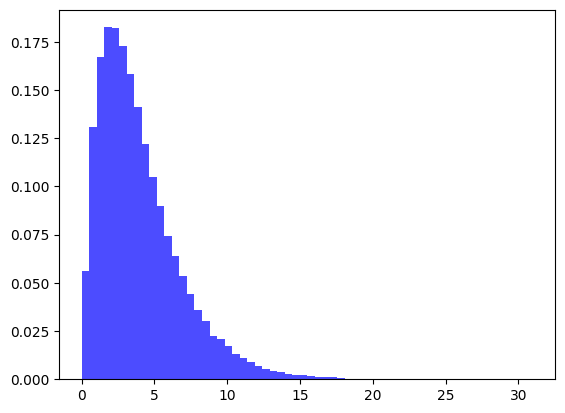

In [28]:
#Distribuição Gama
shape = 2
scale = 2
size = 100000
distribuicao_gama = np.random.gamma(shape, scale, size)

plt.hist(distribuicao_gama,color = 'blue', label = 'Temperatura', density = True, alpha = 0.7 , bins = 60)
plt.show()

In [79]:
# Criar amostras: 10, 40, 80, 120, contendo 300 valores

amostra_10 = []
amostra_40 = []
amostra_80 = []
amostra_120 = []

np.random.seed(1)
for _ in range(10):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_10.append(sample_tlc)

np.random.seed(2)
for _ in range(40):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_40.append(sample_tlc)

np.random.seed(3)
for _ in range(80):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_80.append(sample_tlc)

np.random.seed(4)
for _ in range(120):
  sample_tlc = np.random.choice(distribuicao_gama, size = 300)
  amostra_120.append(sample_tlc)

In [80]:
# Tirando as médias
medias_10 = []
medias_40 = []
medias_80 = []
medias_120 = []

for array in amostra_10:
  medias_10.append(np.mean(array))

for array in amostra_40:
  medias_40.append(np.mean(array))

for array in amostra_80:
  medias_80.append(np.mean(array))

for array in amostra_120:
  medias_120.append(np.mean(array))

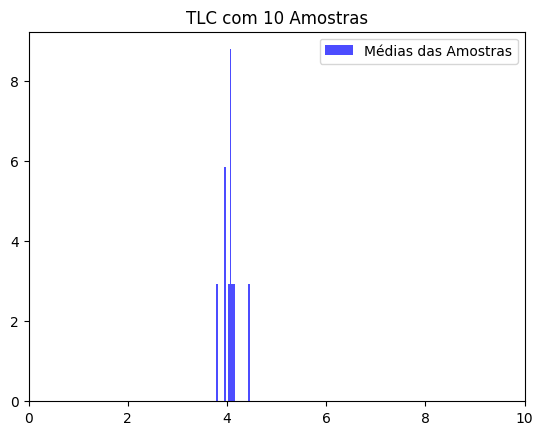

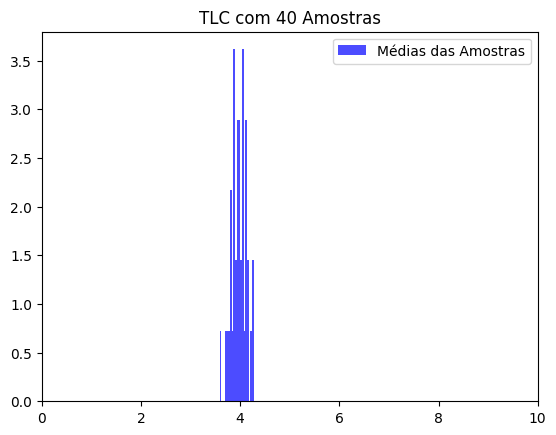

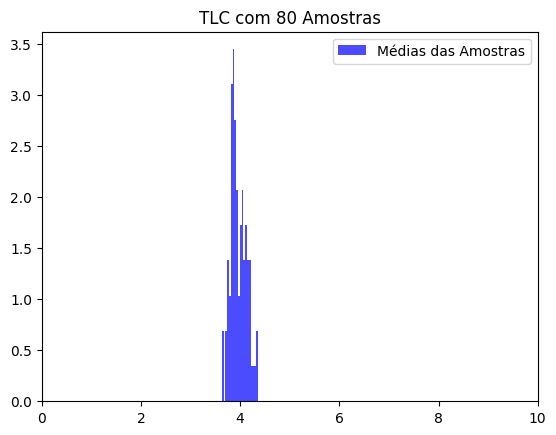

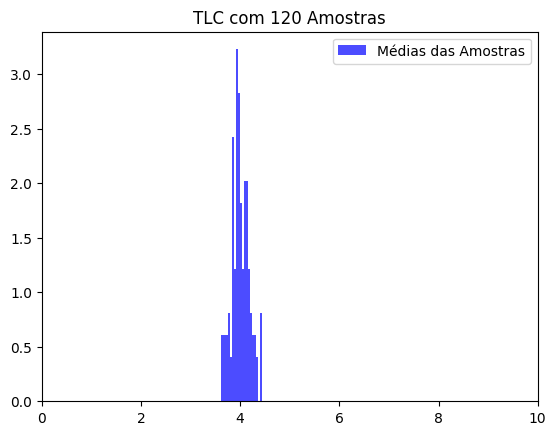

In [81]:
# Plotando Gráficos com TLC
plt.hist(medias_10, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 10 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

plt.hist(medias_40, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 40 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

plt.hist(medias_80, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 80 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()

plt.hist(medias_120, color = 'blue', label = 'Médias das Amostras', density = True, alpha = 0.7 , bins = 20)
plt.title('TLC com 120 Amostras')
plt.xticks(range(0, 11, 2))
plt.legend()
plt.show()